<a href="https://colab.research.google.com/github/Nicolas20Torres/Guia_1/blob/master/An%C3%A1lisis_exploratorio_de_datos_datos_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://universidadean.edu.co/sites/default/files/noticias/galeria/Logo-Universidad-Ean-fondo-negro-Galeria_1.jpg" alt = "Encabezado MLDS" width = "30%">  </img>


#**Entendimiento de los datos**
---

El desarrollo de las actividades de esta guía le permitirá poner en práctica herramientas de organización y visualización de datos. A través de la construcción de diferentes gráficas y el cálculo de medidas descriptivas como la media, la mediana, la moda, la varianza y la desviación estándar, será posible obtener una visión general de las características principales de los datos, permitiendo identificar patrones y tendencias.

Se trabajará sobre la base de datos *Titanic*, que contiene datos relacionados con los pasajeros y tripulantes a bordo del RMS Titanic, un transatlántico británico que naufragó en el año 1912.


| Variable | Definición | Valores | Tipo de variable |
| --- | --- | --- | --- |
| survived \| alive | Sobreviviente | [0\|no] = No, [1\|yes] = Sí | Cualitativo |
| pclass \| class | Clase del tiquete | 1 = [1\|First], 2 = [2\|Second], 3 = [3\|Third] | Cualitativo |
| sex | Sexo | 'male', 'female' | Cualitativo |
| Age | Edad en años | | Cuantitativo |
| sibsp | Número de hermanos / cónyuge abordo del Titanic | | Cuantitativo |
| parch | Número de padres / hijos abordo del Titanic | | Cuantitativo |
| fare | Costo del ticket | | Cuantitativo |
| embarked | Puerto de embarque | C = Cherbourg, Q = Queenstown, S = Southampton | Cualitativo |
| who | Si es hombre, mujer o niño. | 'man', 'woman', 'child' | Cualitativo |
| adult_male | Si es un hombre mayor de edad. | True, False | Cualitativo |
| deck | Identificación de la cubierta/cabina. | 'A', 'B', 'C', 'D', 'E', 'F', 'G' | Cualitativo |
| alone | Si había embarcado solo. | True, False | Cualitativo |


Ejecute la siguiente celda para importar las librerías necesarias. Si se requiere de librerías adicionales puede anexarlas a la celda.

In [40]:
# Importar librerías (EJECUTE ESTA CELDA)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [41]:
#VERIFICACIÓN DE VERSIONES
!python --version
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Seaborn', sns.__version__)
print('Matplotlib', mpl.__version__)

Python 3.10.12
Pandas 2.1.4
NumPy 1.26.4
Seaborn 0.13.1
Matplotlib 3.7.1


Este material fue realizado con las siguientes versiones:

- Python 3.10.12

- Pandas: 2.0.3

- Numpy: 1.25.2

- Seaborn: 0.13.1

- Matplotlib: 3.7.1

Para cargar los datos ejecute la siguiente celda.

In [42]:
#df1 = sns.load_dataset('titanic', data_home='./')
df1 = sns.load_dataset("titanic")
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Nombres de los integrantes del grupo (Completar)**

##**1. Entendimiento de los datos**
---
> Haga una exploración de las variables con el método **`.info()`**.   
En esta parte se requiere hacer una revisión de la base de datos donde se muestre entre otras cosas:  

1.  Número total de variables que contiene la base de datos.  

2. Escribir las variables que tienen datos faltantes, además, proporcionar el porcentaje total de valores faltantes en la base de datos.
3. Clasificar las variables en cualitativas y numéricas.  

4. Consultar y proponer una metodología de *imputación* de datos para la variable *age*, indique la conveniencia o no de aplicar una metodología de este tipo.  

**`Nota:`** Sobre el punto 4, no es necesario relizar el proceso de imputación, solo explicar la propuesta de imputación.


In [43]:
# Escriba aquí el código para realizar en análisis solicitado
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [44]:
# Identificar el total de valores faltantes y su porcentaje
total_faltantes = df1.isnull().sum()
porcentaje_faltantes = (total_faltantes / len(df1)) * 100
# Filtrar variables con datos faltantes
faltantes = total_faltantes[total_faltantes > 0]
porcentaje_faltantes = porcentaje_faltantes[porcentaje_faltantes > 0]

# Mostrar los resultados
faltantes, porcentaje_faltantes

(age            177
 embarked         2
 deck           688
 embark_town      2
 dtype: int64,
 age            19.865320
 embarked        0.224467
 deck           77.216611
 embark_town     0.224467
 dtype: float64)

In [45]:
# Clasificacion de variables cualitativas y cualitativas
variables_cualitativas = df1.select_dtypes(include=['object', 'category']).columns.tolist()
variables_numericas = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f'Variables Cualitativas: {variables_cualitativas}')
print(f'Variables Cuantitativas: {variables_numericas}')

Variables Cualitativas: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']
Variables Cuantitativas: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


## **Propuesta de metodologia para imputación de variable age**

   ### **Imputación con la media**  
   __________________________________________________________________________
   **Descripción**: Rellena los valores faltantes de la variable con la media de los valores observados.

   **Ventajas**: Fácil de implementar y rápida.

   **Desventajas**: No considera la variabilidad de los datos, puede distorsionar la distribución si hay outliers.

   ```python
   df1['age'].fillna(df1['age'].mean(), inplace=True)
   ```

   ### **Imputación con la mediana**
   __________________________________________________________________________
   **Descripción**: Rellena los valores faltantes con la mediana.

   **Ventajas**: Robusta frente a outliers.

   **Desventajas**: Aunque es más robusta, sigue sin tener en cuenta posibles relaciones con otras variables.

   ```python
   df1['age'].fillna(df1['age'].median(), inplace=True)
   ```
   ### **Imputación con la moda**
   __________________________________________________________________________
   **Descripción**: Se utiliza el valor más frecuente.

   **Ventajas**: Útil cuando los valores están muy agrupados alrededor de un valor específico.

   **Desventajas**: Puede no ser apropiado para una variable continua como la edad.

   ```python
   df1['age'].fillna(df1['age'].mode()[0], inplace=True)
   ```

## **2. Distribución de la tarifa**
---

1. Represente gráficamente la distribución de la tarifa del tiquete de ingreso de los pasajeros a bordo del *Titanic* por medio de un **histograma**.
2. Realice un análisis del histograma obtenido haciendo comentarios sobre la forma, dispersión de los datos y existencia de datos atípicos.

**`Nota:`** Tenga en cuenta que la gráfica debe tener como mínimo los siguientes elementos:  
- Título o encabezado
- Figura o gráfica
- Fuente de los datos
- Leyendas (si se requiere)  


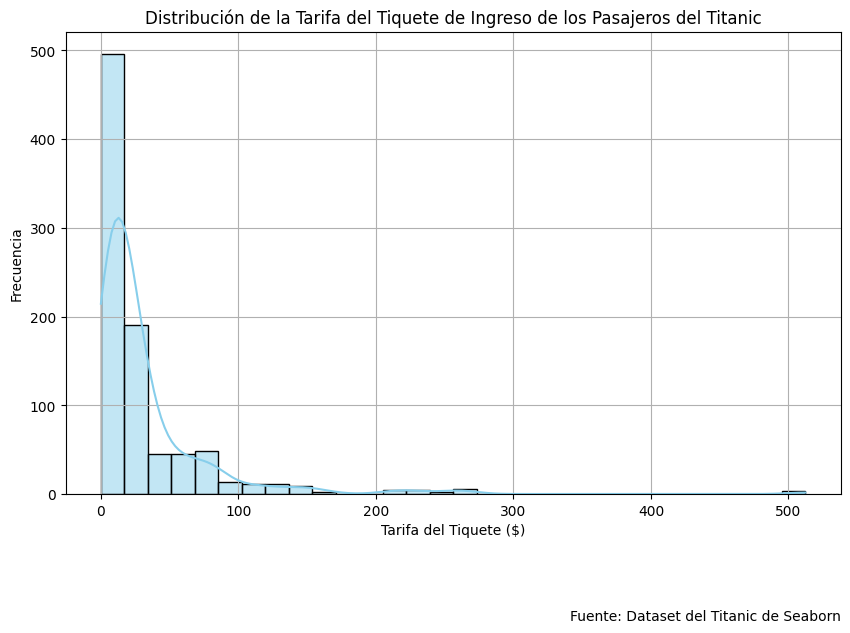

In [46]:
# Escriba aquí el código para realizar la gráfica solicitada

df1 = sns.load_dataset('titanic')


plt.figure(figsize=(10, 6))
sns.histplot(df1['fare'], bins=30, kde=True, color='skyblue')

plt.title('Distribución de la Tarifa del Tiquete de Ingreso de los Pasajeros del Titanic')
plt.xlabel('Tarifa del Tiquete ($)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.figtext(0.9, -0.1, 'Fuente: Dataset del Titanic de Seaborn', horizontalalignment='right')

plt.show()


##**3. Proporción de sobrevivientes**
---

1. Represente gráficamente la variable *survived* de la base de datos por medio de un **diagrama de sectores**.
2. Realice un análisis del diagrama de sectores señalando la propoción de pasajeros que sobrevivieron y los que no lo hicieron.

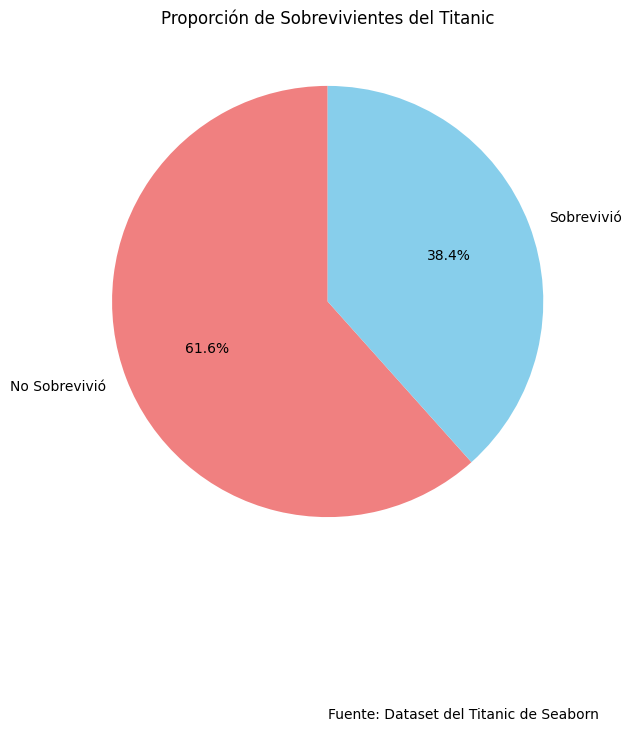

In [47]:
df1 = sns.load_dataset('titanic')


sobrevivientes = df1['survived'].value_counts()


plt.figure(figsize=(7, 7))
plt.pie(sobrevivientes, labels=['No Sobrevivió', 'Sobrevivió'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Proporción de Sobrevivientes del Titanic')
plt.figtext(0.9, -0.1, 'Fuente: Dataset del Titanic de Seaborn', horizontalalignment='right')


plt.show()


## **4. Distribución de pasajeros y tripulación**
---
Realice una exploración la distribución de los pasajeros y tripulación, distinguiendo por género y edad, y analizando la relación que estas variables tuvieron con su supervivencia.  

1. Explorar la distribución de edades para mujeres y hombres en dos gráficas. Se deberá representar mediante dos **histogramas** la edad de los pasajeros en dos gráficas en la misma figura, usando para discriminar las distribuciones la variable categórica sexo (**`sex`**)

> * Los diagramas pueden ser construidos como un **`FacetGrid`** de la librería *Seaborn*.

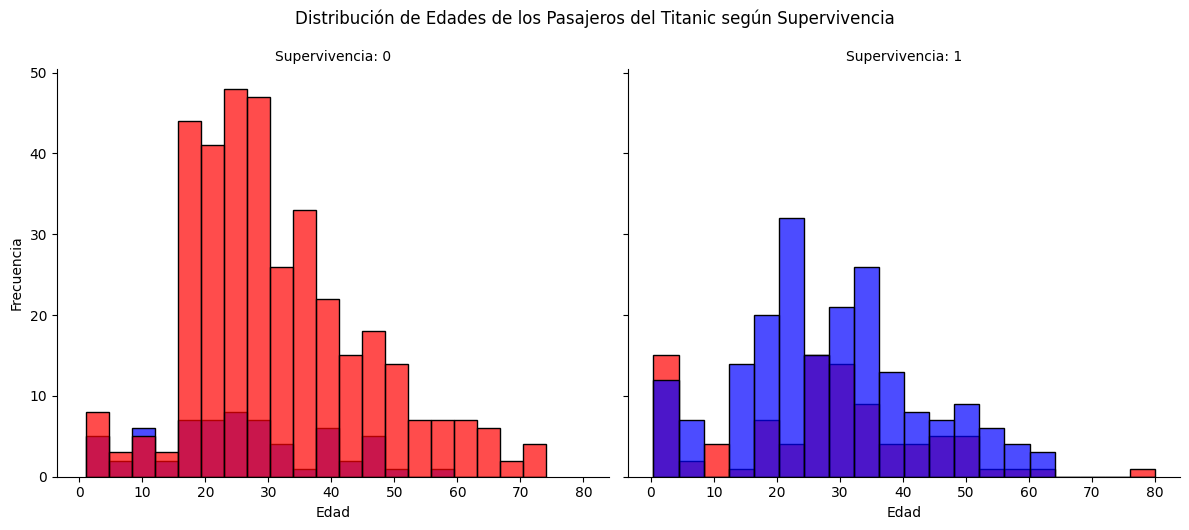

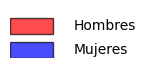

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset Titanic
df1 = sns.load_dataset('titanic')

# Crear el FacetGrid, dividiendo por columnas 'survived' (0 = no sobrevivió, 1 = sobrevivió)
g = sns.FacetGrid(df1, col='survived', height=5, aspect=1.2)

# Mapear el histograma de la edad, con distinción por sexo y diferentes colores
g.map_dataframe(sns.histplot, x='age', hue='sex', bins=20, palette={'female': 'blue','male': 'red' }, kde=False, alpha=0.7)

# Añadir título general para la figura
g.fig.suptitle('Distribución de Edades de los Pasajeros del Titanic según Supervivencia', y=1.05)

# Ajustar las etiquetas de los ejes
g.set_axis_labels('Edad', 'Frecuencia')

# Añadir títulos personalizados para cada subgráfico
g.set_titles(col_template='Supervivencia: {col_name}')

# Crear una figura y un eje para el gráfico pequeño
fig = plt.figure()
ax = fig.add_axes([0.05, 0.85, 0.2, 0.1])  # [x, y, width, height]

# Crear el primer recuadro (mujeres)
ax.add_patch(plt.Rectangle((0, 0), 1, 1, facecolor='blue', edgecolor='black',alpha=0.7))
ax.text(1.5, 0.5, 'Mujeres', ha='left', va='center', color='black', fontsize=10)

# Crear el segundo recuadro (hombres)
ax.add_patch(plt.Rectangle((0, 1.5), 1, 1, facecolor='red', edgecolor='black',alpha=0.7))
ax.text(1.5, 2.0, 'Hombres', ha='left', va='center', color='black', fontsize=10)

# Configurar los ejes del gráfico pequeño
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.axis('off')  # Ocultar los ejes

# Mostrar gráfico principal con el gráfico pequeño
plt.show()






##**5. Primera, segunda y tercera clase**
---
Cuando ocurre la tragedia, la evacuación se realizó dando prioridad a al registrode clase de los pasajeros. Vamos a explorar la distribución de personas, por edad, que correspondían a cada clase para conocer cómo influyó esto en su supervivencia.

1. Debe representar gráficamente la distribución y medidas de posición de las edades de los pasajeros a bordo del *Titanic* en cada clase utilizando una **diagramas de cajas**.
**`Nota:`** Dado que se tiene tres clases, se espera que una única gráfica que contenga tres diagramas de caja, esto permitirá la respectiva comparación y análisis.

<ipython-input-49-414346eb6c8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='pclass', y='age', palette='pastel')


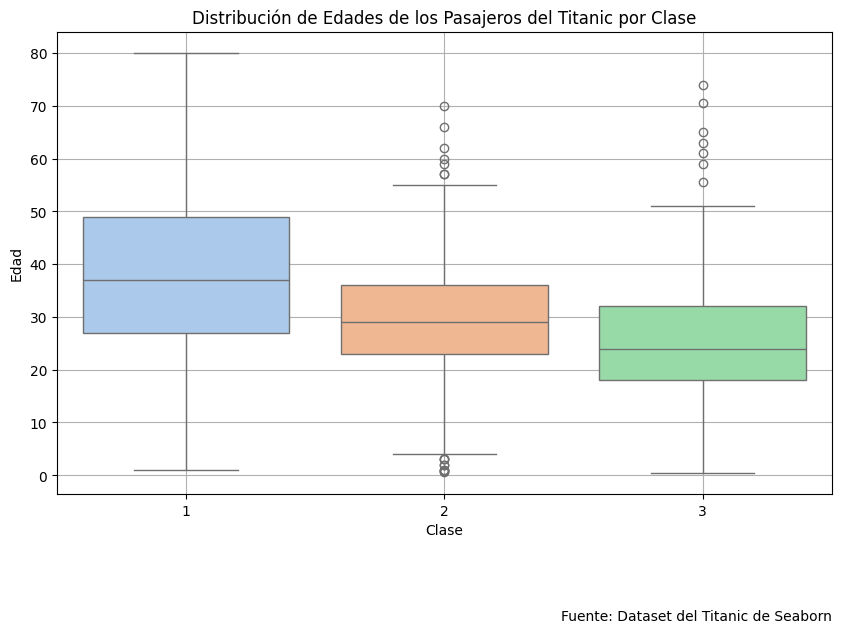

In [49]:
# Cargar el conjunto de datos del Titanic
df1 = sns.load_dataset('titanic')


plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='pclass', y='age', palette='pastel')


plt.title('Distribución de Edades de los Pasajeros del Titanic por Clase')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.grid(True)
plt.figtext(0.9, -0.1, 'Fuente: Dataset del Titanic de Seaborn', horizontalalignment='right')


plt.show()

##**6. Medidas de tendencia central**
---
1. Calcular el promedio de edad de los pasajeros del Titanic
2. Calcular la mediana de la edad de los pasajeros del Titanic.
3. Calcular el promedio del costo del tiquete de los pasajeros del Titanic
4. Calcular la mediana del costo de los tiquetes de los padajeros del Titanic.
5. Conformar un **diccionario** con los resultados de los puntos 1, 2, 3 y 4.
6. Comparar la media y mediana de cada una de las variables ¿ Tiene sesgo la distribución de estas variables?

In [50]:
# Escriba aquí el código para calcular las medidas de tendencia central solicitadas
edad_promedio = np.mean(df1['age'])
edad_mediana = np.median(df1['age'].dropna())
tiquete_promedio = np.mean(df1['fare'])
tiquete_mediana = np.median(df1['fare'])

In [51]:
# Escriba aquí el código para construir el diccionario solicitado
resultados = {
    'Promedio Edad': edad_promedio,
    'Mediana Edad': edad_mediana,
    'Promedio Tiquete': tiquete_promedio,
    'Mediana Tiquete': tiquete_mediana
}
print(f'Resulstado optenido: {resultados}')

Resulstado optenido: {'Promedio Edad': 29.69911764705882, 'Mediana Edad': 28.0, 'Promedio Tiquete': 32.204207968574636, 'Mediana Tiquete': 14.4542}


##**7. Medidas de dispersión**
---
1. Para cada una de las categorías de la variable **pclass** calcule la media y desviación estándar de la variable precio del tiquete (fare).
2. Utilizar los datos hallados en la parte 1 para calcular el coeficiente de variación de la variable precio del tiquete (fare) en cada una de las categorías de la variable **pclass**. Comparar y analizar los resultados.

In [52]:
# Escriba aquí el código para realizar los cálculos solicitados
medias_tiquete = df1.groupby('pclass')['fare'].mean()
desviaciones_tiquete = df1.groupby('pclass')['fare'].std()


coeficiente_variacion = (desviaciones_tiquete / medias_tiquete) * 100


resultados_dispersion = pd.DataFrame({
    'Media Tiquete': medias_tiquete,
    'Desviación Estándar Tiquete': desviaciones_tiquete,
    'Coeficiente de Variación (%)': coeficiente_variacion
}).reset_index()

# DataFrame con los resultado optenidos
resultados_dispersion

,pclass,Media Tiquete,Desviación Estándar Tiquete,Coeficiente de Variación (%)
0,1,84.154687,78.380373,93.138451
1,2,20.662183,13.417399,64.936985
2,3,13.675550,11.778142,86.125542


**¡Felicitaciones!** ¡Muy buen trabajo!

## **Entrega**

Para entregar el notebook por favor haga lo siguiente:
1. Descargue el notebook (`Archivo` -> `Descargar .ipynb`).
2. Importelo como archivo HTML.
3. Realice el envío del archivo en la tarea dispuesta en el aula virtual. No olvide escribir los nombres de los integrantes del grupo en el momento de hacer la entrega.


## **Recursos adicionales**
---

Para complemetar sobre el uso de funciones en Python, puede consultar  la [documentación oficial](https://pandas.pydata.org/pandas-docs/stable/reference/index.html), y en especial la [Guía de usuario](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) de *pandas*.

Además, a continuación se presenta una lista de recursos adicionales que le podrán ser de utilidad:


*  [Data vedas - Exploración y preparación de los datos](https://www.datavedas.com/data-exploration-and-preparation/)
*  [Kaggle - Pandas](https://www.kaggle.com/learn/pandas)
*  [CodeCademy - Learn Data Analysis with Pandas](https://www.codecademy.com/learn/data-processing-pandas)

* [*Matplotlib*: Visualization with Python](http://www.matplotlib.org)
* [Matplotlib Gallery - (Ejemplos)](http://matplotlib.org/gallery.html) - Se recomienda revisar la galería y ajustar el código de las visualizaciones requeridas.
* [Nicolas P. Rougier - *Matplotlib* tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)
* [IBM (Coursera) - Data Visualization with *Python*](https://www.coursera.org/learn/python-for-data-visualization)
* [DataCamp - Introduction to Data Visualization with *Matplotlib*](https://www.datacamp.com/courses/introduction-to-matplotlib)